In [1]:
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler


##### Data

In [2]:
panelist_data = np.loadtxt("data/vlb_data_combined.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_data


array([[50., 20., 60., ..., 50., 40., 40.],
       [30., 40., 60., ..., 10., 30., 60.],
       [30., 50., 50., ..., 10., 40., 70.],
       ...,
       [20., 60., 30., ...,  0., 40., 30.],
       [10., 30., 60., ...,  0., 40., 60.],
       [40., 30., 50., ..., 40., 30., 60.]])

## Normalize


In [3]:
panelist_data_df = pd.read_table("data/vlb_data_combined.txt", delimiter=',')
panelist_data_df

,panelist,samplekey,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,date
0,1,000656,50,20,60,50,30,30,50,40,40,2023-01-12
1,1,000657,30,40,60,40,40,30,10,30,60,2023-01-12
2,1,000658,30,50,50,50,40,40,10,40,70,2023-01-12
3,1,000661,60,70,60,50,50,60,0,40,60,2023-01-12
4,1,000662,40,60,50,50,50,40,0,30,60,2023-01-12
...,...,...,...,...,...,...,...,...,...,...,...,...
1241,3,000926,40,30,40,40,30,20,40,20,60,2022-10-17
1242,3,000927,40,70,60,70,40,50,0,40,80,2022-10-17
1243,3,000929,20,60,30,40,30,50,0,40,30,2022-10-17
1244,3,000930,10,30,60,70,30,70,0,40,60,2022-10-17


In [4]:
X = panelist_data_df.drop('panelist',axis = 1)  
X = X.drop('samplekey',axis = 1)  
X = X.drop('date',axis = 1)  

y = panelist_data_df['samplekey']
X

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
0,50,20,60,50,30,30,50,40,40
1,30,40,60,40,40,30,10,30,60
2,30,50,50,50,40,40,10,40,70
3,60,70,60,50,50,60,0,40,60
4,40,60,50,50,50,40,0,30,60
...,...,...,...,...,...,...,...,...,...
1241,40,30,40,40,30,20,40,20,60
1242,40,70,60,70,40,50,0,40,80
1243,20,60,30,40,30,50,0,40,30
1244,10,30,60,70,30,70,0,40,60


In [5]:
# Standardization of the dataset before performing PCA
# Z-Transformation:  scaling the data to have a mean (average) of 0 and a standard deviation of 1.
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled[:5,:5]

array([[ 0.71923193, -1.92782017,  0.73083586,  0.1003848 , -0.63164252],
       [-1.11528799, -0.44277292,  0.73083586, -0.80598808,  0.49428964],
       [-1.11528799,  0.29975071, -0.05014311,  0.1003848 ,  0.49428964],
       [ 1.63649189,  1.78479796,  0.73083586,  0.1003848 ,  1.62022181],
       [-0.19802803,  1.04227434, -0.05014311,  0.1003848 ,  1.62022181]])

### UMAP

In [5]:
import umap
from umap import UMAP
import sklearn.cluster as cluster

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Franz\AppData\Local\Programs\Python\Python39\

In [6]:
standard_umap = UMAP(random_state=42).fit_transform(X_scaled)

In [21]:
n_clusters=10
kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(X_scaled)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


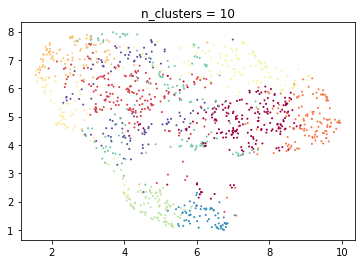

In [22]:
# n_clusters = 10
plt.title("n_clusters = 10")
plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');


In [23]:
def plot_umap(file, n_clusters):
    standard_umap = UMAP(random_state=42).fit_transform(file)
    n_clusters=n_clusters
    kmeans_labels = cluster.KMeans(n_clusters=n_clusters).fit_predict(file)
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=0.1, cmap='Spectral');
    plt.scatter(standard_umap[:, 0], standard_umap[:, 1], c=kmeans_labels, s=1, cmap='Spectral');



c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


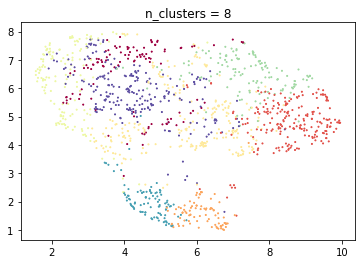

In [24]:
plt.title("n_clusters = 8")
plot_umap(X_scaled, 8)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


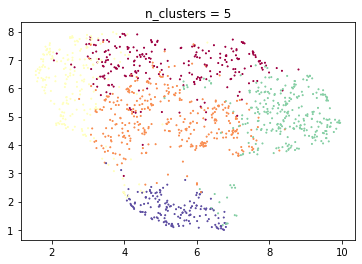

In [25]:
plt.title("n_clusters = 5")
plot_umap(X_scaled, 5)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


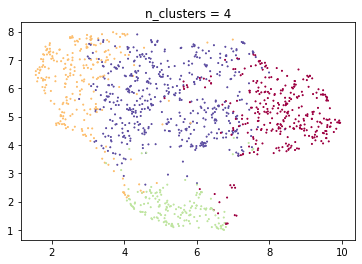

In [27]:
plt.title("n_clusters = 4")
plot_umap(X_scaled, 4)

#### analyse data 

In [26]:
'''
plt.figure(figsize=(20,20), dpi=200)

plt.subplot(4,3,1)
sns.boxplot(x = 'floral', data = panelist_data_df)

plt.subplot(4,3,2)
sns.boxplot(x = 'fruit', data = panelist_data_df)

plt.subplot(4,3,3)
sns.boxplot(x = 'wood', data = panelist_data_df)

plt.subplot(4,3,4)
sns.boxplot(x = 'complexity', data = panelist_data_df)

plt.subplot(4,3,5)
sns.boxplot(x = 'malt', data = panelist_data_df)

plt.subplot(4,3,6)
sns.boxplot(x = 'sweet', data = panelist_data_df)

plt.subplot(4,3,7)
sns.boxplot(x = 'peat', data = panelist_data_df)

plt.subplot(4,3,8)
sns.boxplot(x = 'dried_fruits', data = panelist_data_df)

plt.subplot(4,3,9)
sns.boxplot(x = 'aftertaste', data = panelist_data_df)

# histogram / density plot'''

"\nplt.figure(figsize=(20,20), dpi=200)\n\nplt.subplot(4,3,1)\nsns.boxplot(x = 'floral', data = panelist_data_df)\n\nplt.subplot(4,3,2)\nsns.boxplot(x = 'fruit', data = panelist_data_df)\n\nplt.subplot(4,3,3)\nsns.boxplot(x = 'wood', data = panelist_data_df)\n\nplt.subplot(4,3,4)\nsns.boxplot(x = 'complexity', data = panelist_data_df)\n\nplt.subplot(4,3,5)\nsns.boxplot(x = 'malt', data = panelist_data_df)\n\nplt.subplot(4,3,6)\nsns.boxplot(x = 'sweet', data = panelist_data_df)\n\nplt.subplot(4,3,7)\nsns.boxplot(x = 'peat', data = panelist_data_df)\n\nplt.subplot(4,3,8)\nsns.boxplot(x = 'dried_fruits', data = panelist_data_df)\n\nplt.subplot(4,3,9)\nsns.boxplot(x = 'aftertaste', data = panelist_data_df)\n\n# histogram / density plot"

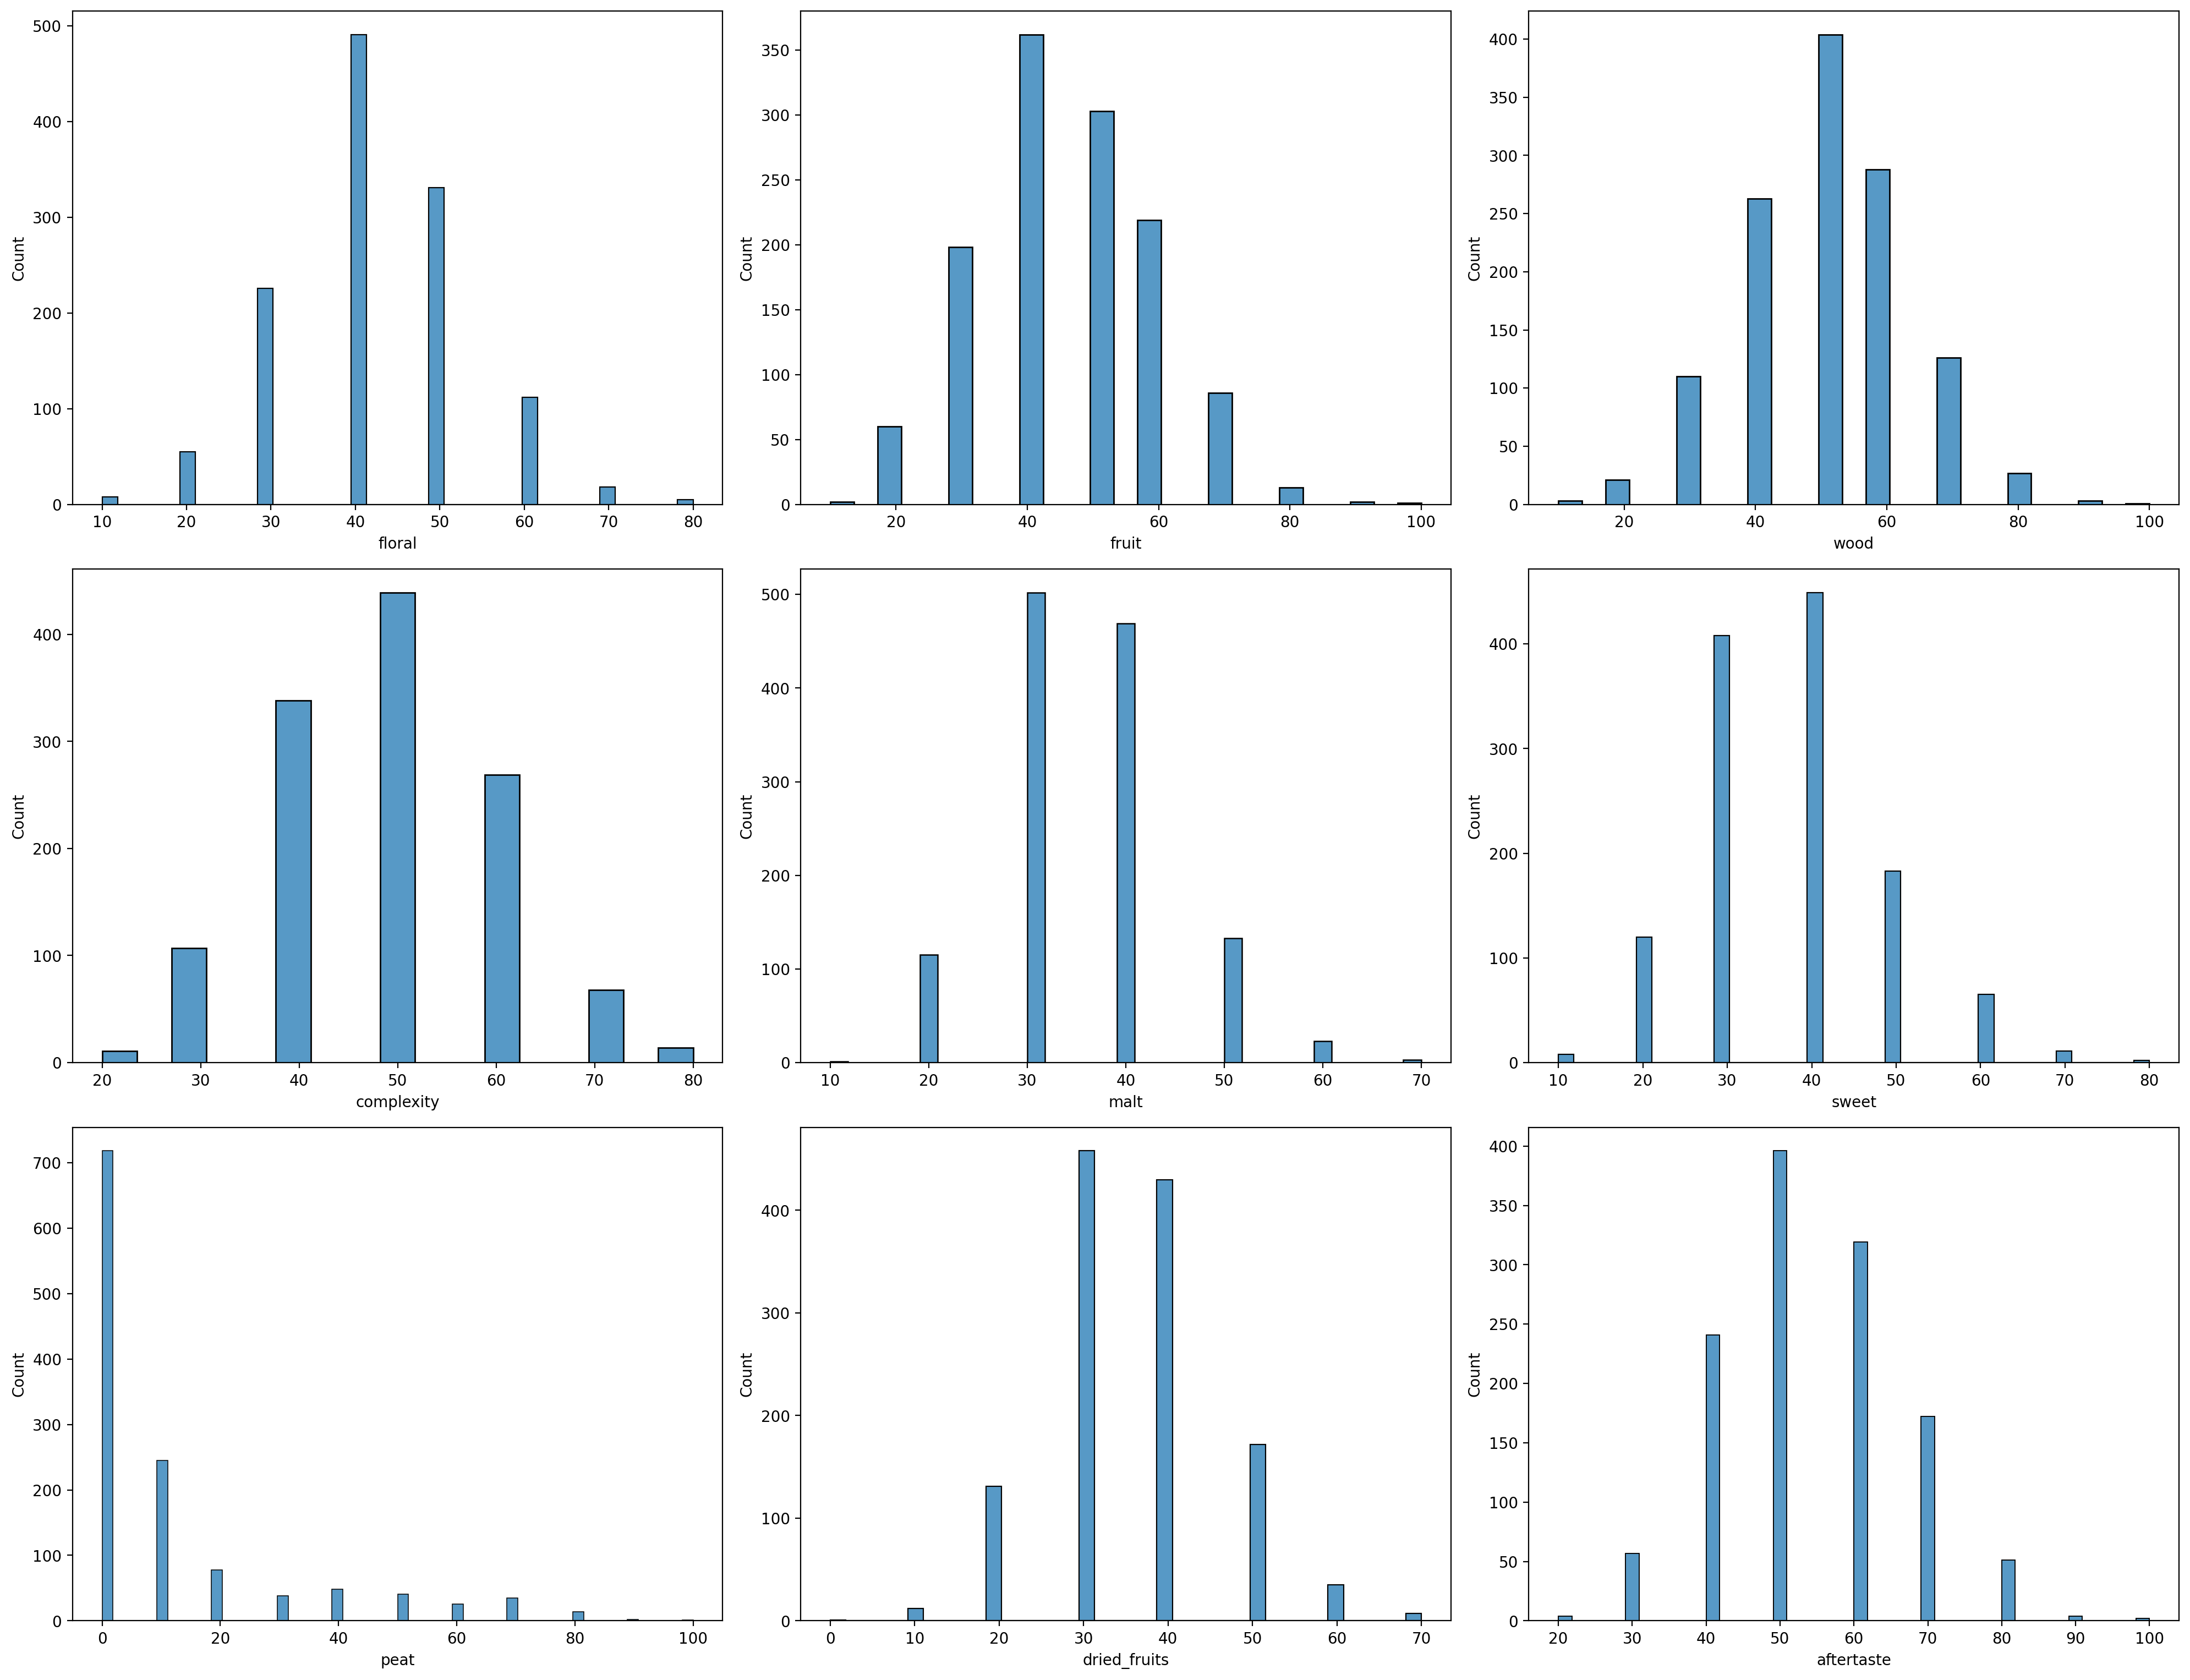

In [27]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.histplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.histplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.histplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.histplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.histplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.histplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.histplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.histplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.histplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


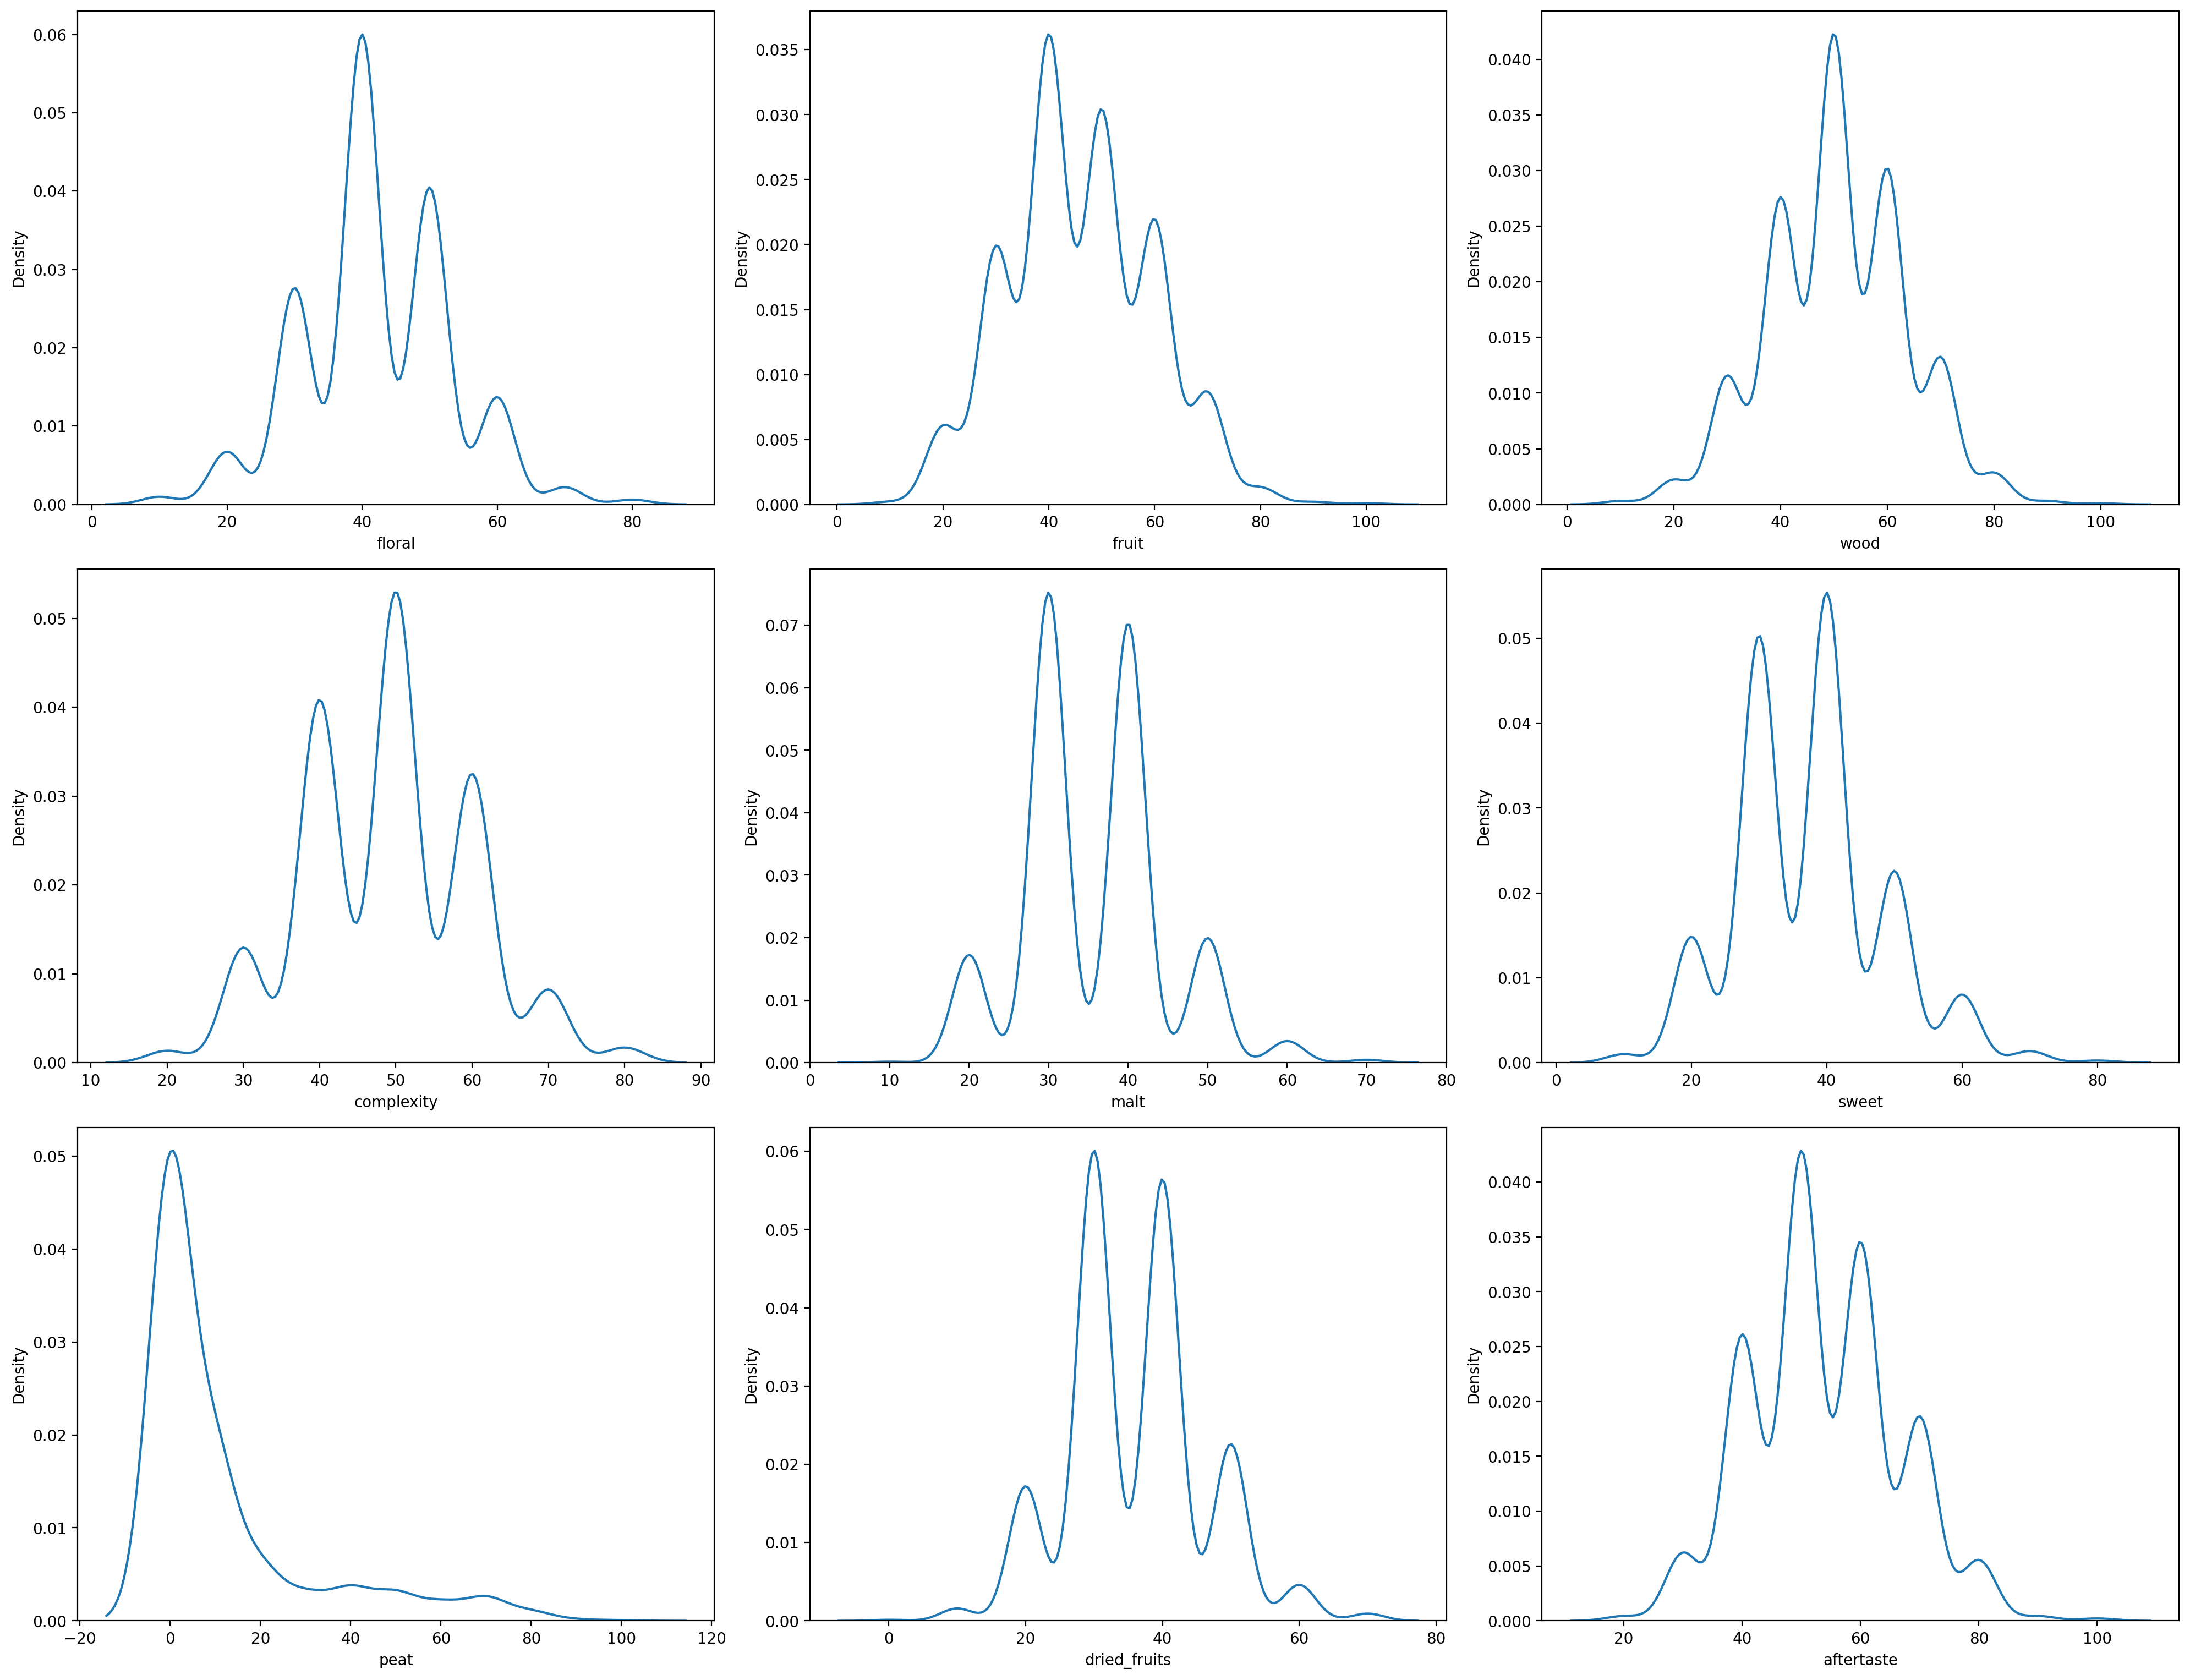

In [28]:
plt.figure(figsize=(20, 20), dpi=200)

plt.subplot(4, 3, 1)
sns.kdeplot(x='floral', data=panelist_data_df)

plt.subplot(4, 3, 2)
sns.kdeplot(x='fruit', data=panelist_data_df)

plt.subplot(4, 3, 3)
sns.kdeplot(x='wood', data=panelist_data_df)

plt.subplot(4, 3, 4)
sns.kdeplot(x='complexity', data=panelist_data_df)

plt.subplot(4, 3, 5)
sns.kdeplot(x='malt', data=panelist_data_df)

plt.subplot(4, 3, 6)
sns.kdeplot(x='sweet', data=panelist_data_df)

plt.subplot(4, 3, 7)
sns.kdeplot(x='peat', data=panelist_data_df)

plt.subplot(4, 3, 8)
sns.kdeplot(x='dried_fruits', data=panelist_data_df)

plt.subplot(4, 3, 9)
sns.kdeplot(x='aftertaste', data=panelist_data_df)

plt.tight_layout()
plt.show()


### kmeans and Pca

In [6]:
from sklearn.decomposition import PCA


In [7]:
X_scaled_df = pd.DataFrame(X_scaled,columns=X.columns)
X_scaled_df.head()	

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
0,0.719232,-1.927820,0.730836,0.100385,-0.631643,-0.689731,1.951986,0.393120,-1.117371
1,-1.115288,-0.442773,0.730836,-0.805988,0.494290,-0.689731,-0.084585,-0.592448,0.500577
2,-1.115288,0.299751,-0.050143,0.100385,0.494290,0.236352,-0.084585,0.393120,1.309551
3,1.636492,1.784798,0.730836,0.100385,1.620222,2.088518,-0.593727,0.393120,0.500577
4,-0.198028,1.042274,-0.050143,0.100385,1.620222,0.236352,-0.593727,-0.592448,0.500577


In [31]:
# Let's see the correlation matrix 
'''plt.figure(figsize = (20,10))       
sns.heatmap(X_scaled_df.corr(),annot = True)'''

'plt.figure(figsize = (20,10))       \nsns.heatmap(X_scaled_df.corr(),annot = True)'

In [8]:
# perform pca
pca = PCA()
pca.fit(X_scaled_df)
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.

PCA()

Text(0, 0.5, 'cumulative explained variance')

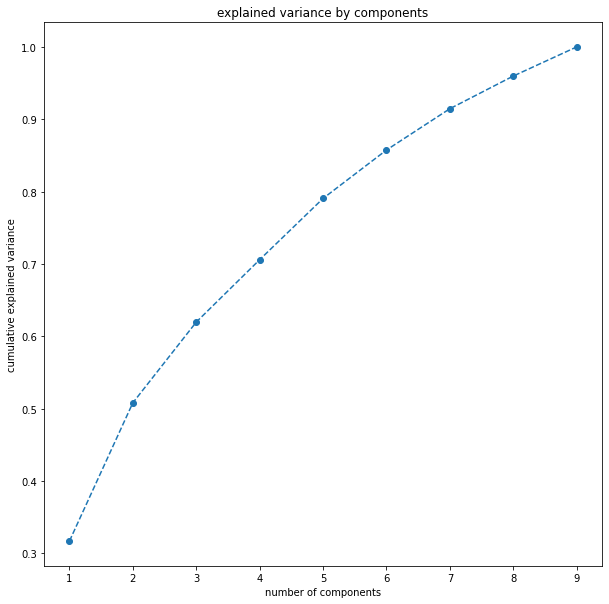

In [37]:
plt.figure(figsize=(10,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# presereve 80 % of variance so 5 components

In [21]:
pca = PCA(n_components=5)
pca.fit(X_scaled)
scores_pca = pca.transform(X_scaled)

In [22]:
# how many clusters should we use? 
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `

Text(0, 0.5, 'wcss')

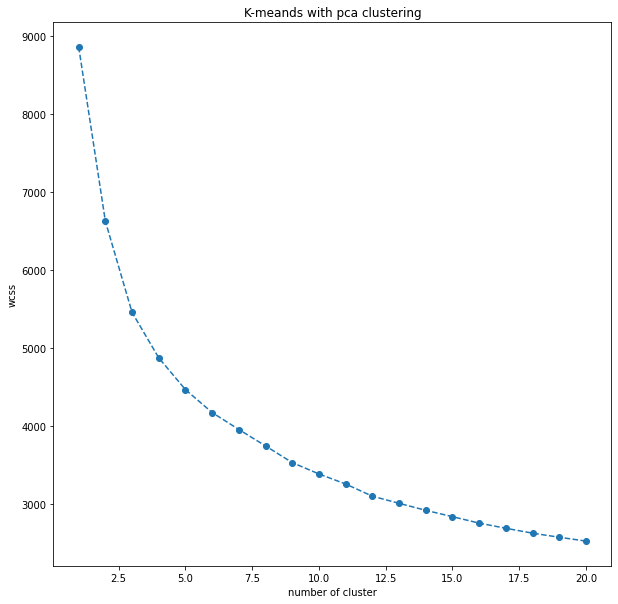

In [23]:
plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K-meands with pca clustering')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
#  => between 4 or 5 clusters

In [25]:
kmeans_pca = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_pca.fit(scores_pca)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [26]:
# create new dataframe
df_pca_kmeans = pd.concat([X_scaled_df.reset_index(drop=True), pd.DataFrame(scores_pca)], axis = 1)
df_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
df_pca_kmeans['kmeans PCA'] = kmeans_pca.labels_
df_pca_kmeans['color'] = df_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})

In [27]:
df_pca_kmeans

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,component 1,component 2,component 3,component 4,component 5,kmeans PCA,color
0,0.719232,-1.927820,0.730836,0.100385,-0.631643,-0.689731,1.951986,0.393120,-1.117371,-0.991845,2.198340,-0.078023,1.307041,-0.481659,0,first
1,-1.115288,-0.442773,0.730836,-0.805988,0.494290,-0.689731,-0.084585,-0.592448,0.500577,-0.412981,0.451245,-1.391665,-0.515152,-0.041232,1,second
2,-1.115288,0.299751,-0.050143,0.100385,0.494290,0.236352,-0.084585,0.393120,1.309551,0.854710,-0.030353,-1.092441,-0.585151,0.290144,1,second
3,1.636492,1.784798,0.730836,0.100385,1.620222,2.088518,-0.593727,0.393120,0.500577,2.781737,-1.110265,1.278258,0.517223,0.644124,2,third
4,-0.198028,1.042274,-0.050143,0.100385,1.620222,0.236352,-0.593727,-0.592448,0.500577,1.026344,-0.699069,0.040698,-0.207585,0.853526,1,second
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,-0.198028,-1.185297,-0.831122,-0.805988,-0.631643,-1.615814,1.442843,-1.578016,0.500577,-2.398223,1.945241,-0.074425,-0.508673,0.566587,0,first
1242,-0.198028,1.784798,0.730836,1.913131,0.494290,1.162435,-0.593727,0.393120,2.118525,3.125113,-0.421332,0.207126,-1.750588,0.572342,2,third
1243,-2.032548,1.042274,-1.612101,-0.805988,-0.631643,1.162435,-0.593727,0.393120,-1.926345,-1.289899,-3.005126,-1.098330,0.553755,0.888384,3,fourth
1244,-2.949808,-1.185297,0.730836,1.913131,-0.631643,3.014601,-0.593727,0.393120,0.500577,1.709884,-0.812964,-2.586950,-0.612490,1.309477,2,third


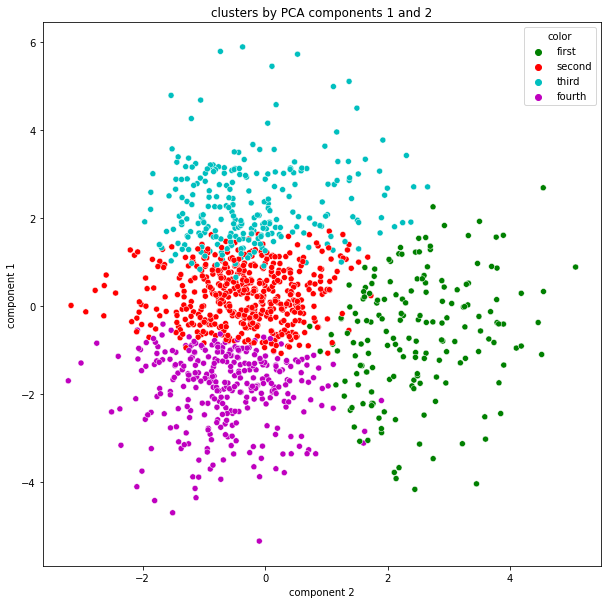

In [28]:
x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=df_pca_kmeans['color'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2')
plt.show()

### TSNE

In [9]:
from sklearn.manifold import TSNE

In [11]:
X_TSNE = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled)

In [12]:
kmeans_tsne = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne.fit(X_TSNE)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [13]:
# create new dataframe
df_TSNE = pd.concat([X_scaled_df.reset_index(drop=True),  pd.DataFrame(X_TSNE)],axis=1)
df_TSNE.columns.values[-2:] = ['component 1', 'component 2']
df_TSNE['kmeans TSNE'] = kmeans_tsne.labels_
df_TSNE['panelist'] = panelist_data_df['panelist']
df_TSNE

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,component 1,component 2,kmeans TSNE,panelist
0,0.719232,-1.927820,0.730836,0.100385,-0.631643,-0.689731,1.951986,0.393120,-1.117371,31.958895,-56.192791,1,1
1,-1.115288,-0.442773,0.730836,-0.805988,0.494290,-0.689731,-0.084585,-0.592448,0.500577,-9.387696,3.337018,0,1
2,-1.115288,0.299751,-0.050143,0.100385,0.494290,0.236352,-0.084585,0.393120,1.309551,-27.781227,24.848059,0,1
3,1.636492,1.784798,0.730836,0.100385,1.620222,2.088518,-0.593727,0.393120,0.500577,-78.074356,18.445707,2,1
4,-0.198028,1.042274,-0.050143,0.100385,1.620222,0.236352,-0.593727,-0.592448,0.500577,-23.902626,3.991569,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1241,-0.198028,-1.185297,-0.831122,-0.805988,-0.631643,-1.615814,1.442843,-1.578016,0.500577,46.807552,-55.266289,1,3
1242,-0.198028,1.784798,0.730836,1.913131,0.494290,1.162435,-0.593727,0.393120,2.118525,-67.912766,-22.536085,2,3
1243,-2.032548,1.042274,-1.612101,-0.805988,-0.631643,1.162435,-0.593727,0.393120,-1.926345,21.716091,44.629498,0,3
1244,-2.949808,-1.185297,0.730836,1.913131,-0.631643,3.014601,-0.593727,0.393120,0.500577,-74.123779,12.952939,2,3


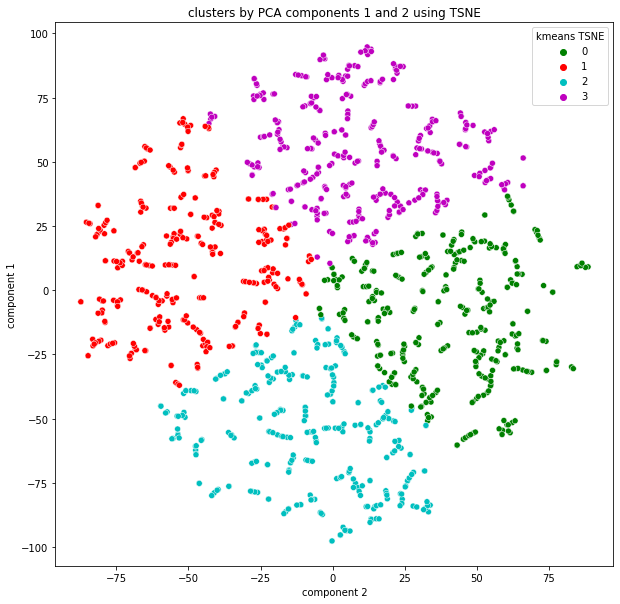

In [14]:
x_axis = df_TSNE['component 2']
y_axis = df_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=df_TSNE, hue = df_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE')
plt.show()

## Fuzzy approach

In [16]:
import skfuzzy as fuzz


In [17]:
# Define the number of clusters
k = 4

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)



[3 2 1 ... 3 1 2]


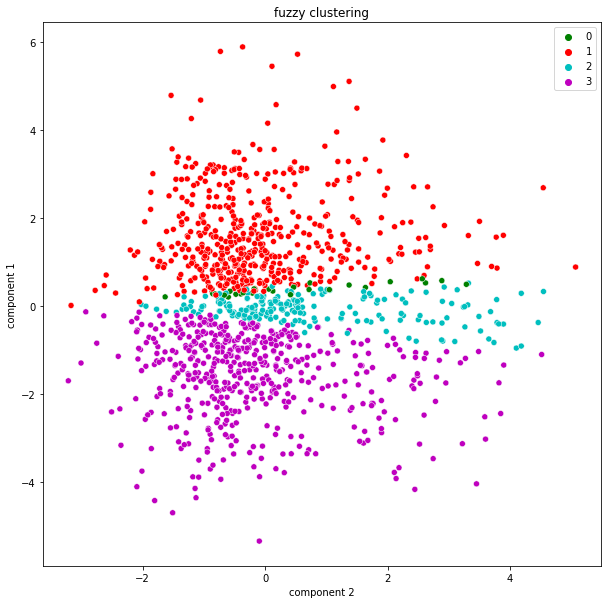

In [29]:
x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=['g','r','c','m'])
plt.title('fuzzy clustering')
plt.show()

[8 8 9 ... 4 9 8]


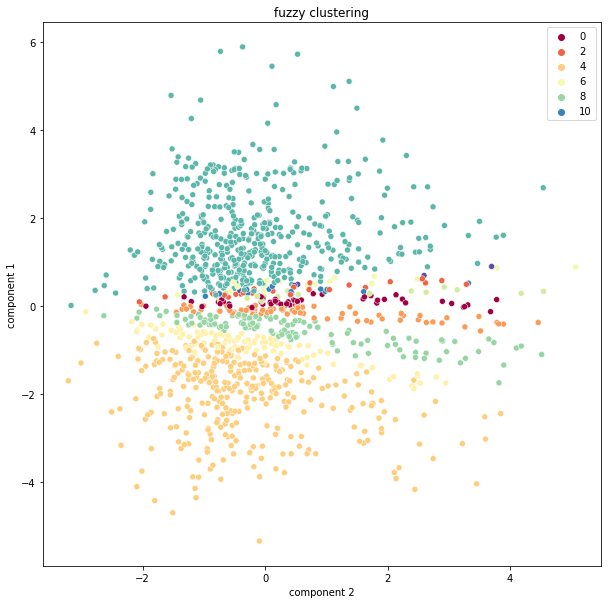

In [182]:

# Define the number of clusters
k = 12

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)


x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette='Spectral')
plt.title('fuzzy clustering')
plt.show()

[0 0 1 ... 0 1 0]


C:\Users\Franz\AppData\Local\Temp\ipykernel_17544\2148904962.py:17: UserWarning: The palette list has more values (8) than needed (3), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))


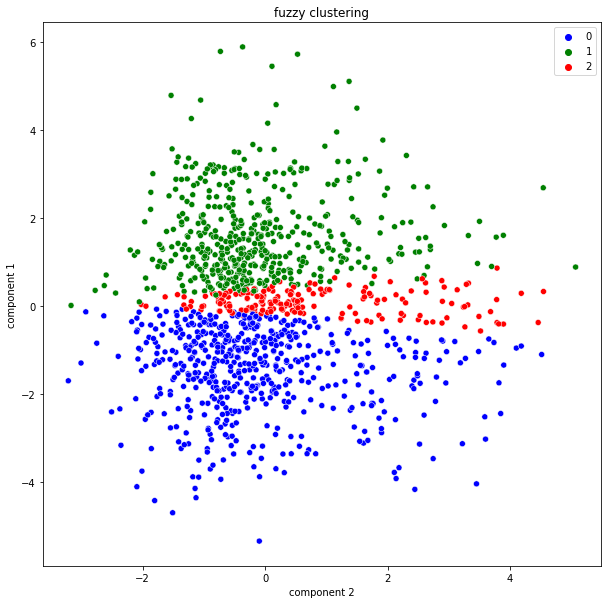

In [162]:
# Define the number of clusters
k = 3

# Apply fuzzy c-means clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(
    X_scaled.T, k, 2, error=0.005, maxiter=1000, init=None
)

# Extract the cluster labels
cluster_labels = np.argmax(u, axis=0)

# Print the cluster labels
print(cluster_labels)
x_axis = df_pca_kmeans['component 2']
y_axis = df_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=cluster_labels, palette=(['b', 'g', 'r', 'c', 'm', 'y', 'k', 'w']))
plt.title('fuzzy clustering')
plt.show()


### Chat GPT dataset

In [30]:
chat_gpt_data = pd.read_table("data/csv_WBS_CahtData_professional_HH.csv", delimiter=';')
chat_gpt_data.columns = ["Whisky Name","floral", 'fruit', 'wood', 'complexity' , 'malt' ,'sweet', 'peat', 'dried_fruits', 'aftertaste' ]
X_gpt = chat_gpt_data.drop('Whisky Name',axis = 1)  
y_gpt = chat_gpt_data['Whisky Name']

scaler = StandardScaler()
X_gpt_scaled = scaler.fit_transform(X_gpt)

##### Compare flavors

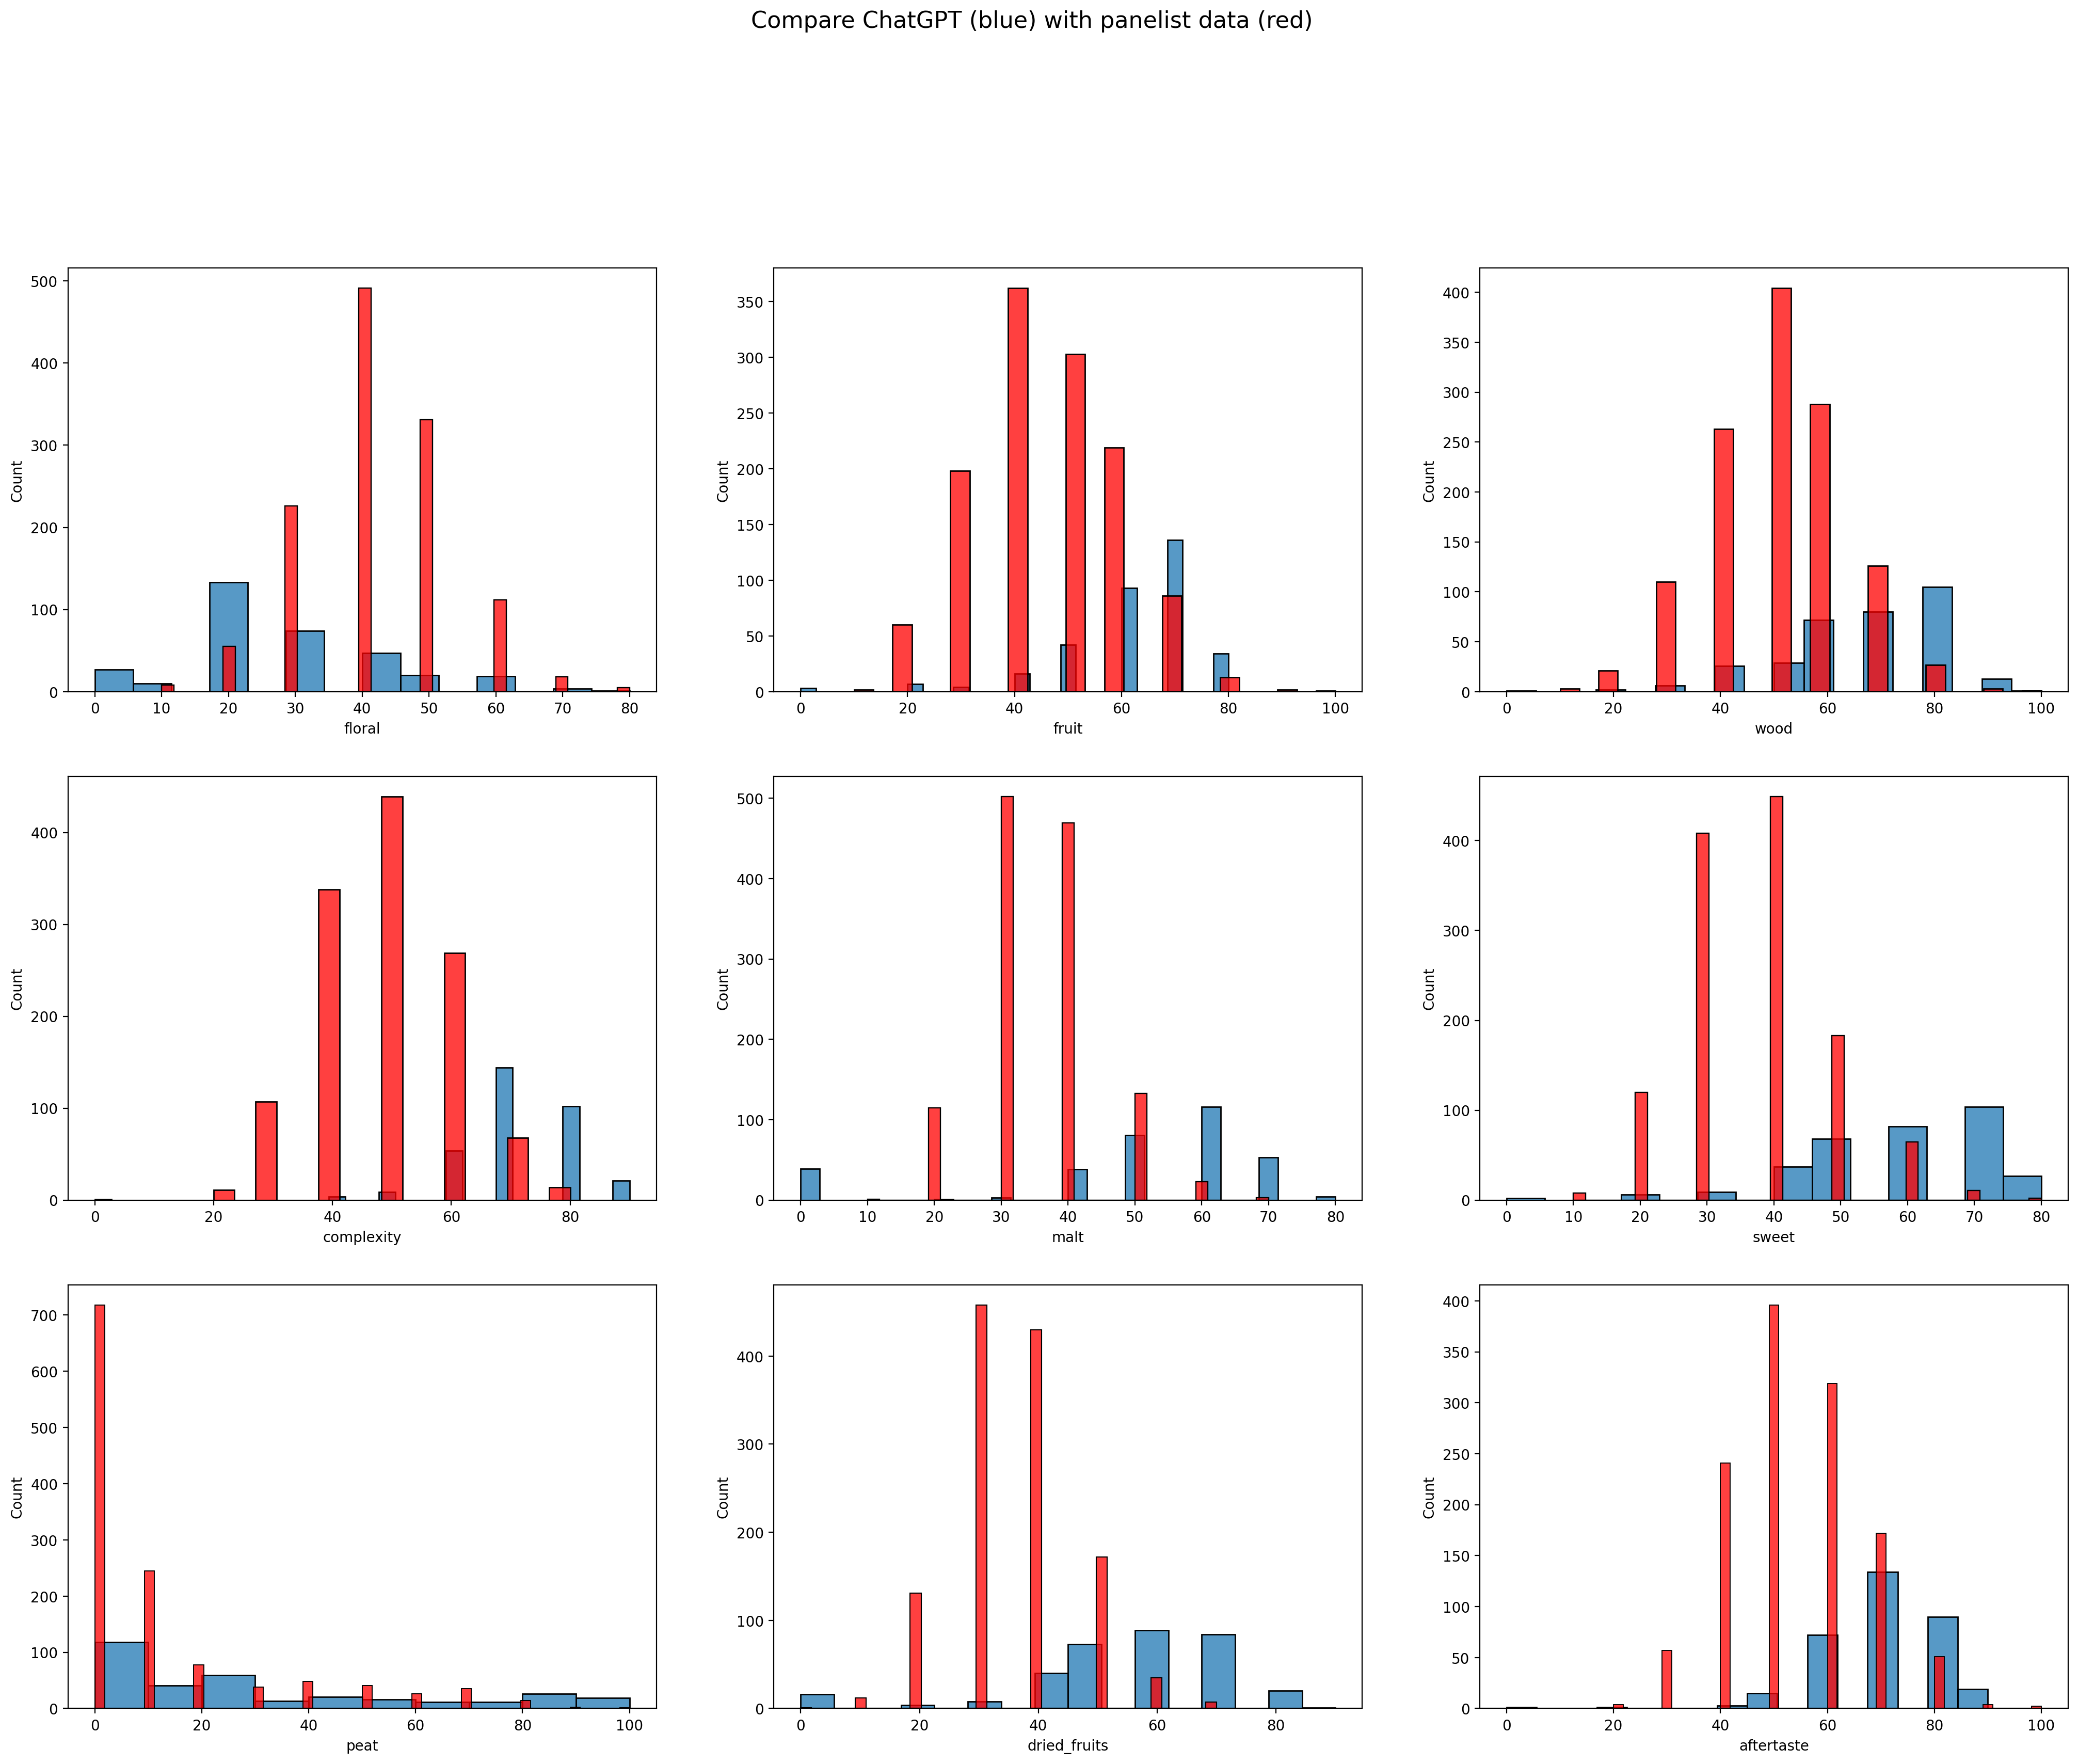

In [62]:
plt.figure(figsize=(25,25), dpi=200)
plt.suptitle("Compare ChatGPT (blue) with panelist data (red) ", size = 16)

plt.subplot(4,3,1)
sns.histplot(x = 'floral', data = chat_gpt_data)
sns.histplot(x = 'floral', data = panelist_data_df, color="r")

plt.subplot(4,3,2)
sns.histplot(x = 'fruit', data = chat_gpt_data)
sns.histplot(x = 'fruit', data = panelist_data_df, color="r")

plt.subplot(4,3,3)
sns.histplot(x = 'wood', data = chat_gpt_data)
sns.histplot(x = 'wood', data = panelist_data_df, color="r")

plt.subplot(4,3,4)
sns.histplot(x = 'complexity', data = chat_gpt_data)
sns.histplot(x = 'complexity', data = panelist_data_df, color="r")

plt.subplot(4,3,5)
sns.histplot(x = 'malt', data = chat_gpt_data)
sns.histplot(x = 'malt', data = panelist_data_df, color="r")

plt.subplot(4,3,6)
sns.histplot(x = 'sweet', data = chat_gpt_data)
sns.histplot(x = 'sweet', data = panelist_data_df, color="r")

plt.subplot(4,3,7)
sns.histplot(x = 'peat', data = chat_gpt_data)
sns.histplot(x = 'peat', data = panelist_data_df, color="r")

plt.subplot(4,3,8)
sns.histplot(x = 'dried_fruits', data = chat_gpt_data)
sns.histplot(x = 'dried_fruits', data = panelist_data_df, color="r")

plt.subplot(4,3,9)
sns.histplot(x = 'aftertaste', data = chat_gpt_data)
sns.histplot(x = 'aftertaste', data = panelist_data_df, color="r")



plt.show()

In [63]:
X_scaled_gpt = pd.DataFrame(X_gpt_scaled,columns=X_gpt.columns)
X_scaled_gpt.head()	

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste
0,-1.820846,0.577769,-0.440812,-0.154207,-2.436067,0.806069,-0.879301,0.842148,-0.930059
1,-1.820846,-0.158173,1.572897,0.820496,-2.436067,1.512961,-0.879301,0.274503,-0.013677
2,-1.820846,-4.573825,0.901661,-0.154207,-2.436067,-4.142180,1.093238,-3.131367,0.902705
3,3.392688,0.577769,-0.440812,1.795198,-2.436067,0.806069,-0.879301,0.842148,0.902705
4,-1.820846,1.313712,0.230424,0.820496,-2.436067,1.512961,-0.879301,0.274503,-0.013677


In [ ]:
'''# perform pca
pca = PCA()
pca.fit(X_scaled_gpt)
#  we need to decide how many features we’d like to keep based on the cumulative variance plot.
# plt.figure(figsize=(10,10))
plt.plot(range(1,10), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('explained variance by components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
# presereve 80 % of variance so 5 components
pca = PCA(n_components=5)
pca.fit(X_scaled_gpt)
scores_pca = pca.transform(X_scaled_gpt)
# how many clusters should we use? 
wcss = []
for i in range(1,21):
    kmeans_pca = KMeans(n_clusters=i,init = 'k-means++', random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

plt.figure(figsize=(10,10))
plt.plot(range(1,21), wcss, marker='o', linestyle='--')
plt.title('K-means with pca clustering')
plt.xlabel('number of cluster')
plt.ylabel('wcss')
#  => between 4 or 5 clusters'''

In [71]:
pca = PCA(n_components=5)
pca.fit(X_scaled_gpt)
scores_pca_gpt = pca.transform(X_scaled_gpt)
kmeans_pca_gpt = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_pca_gpt.fit(scores_pca_gpt)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [72]:
# create new dataframe
gpt_pca_kmeans = pd.concat([X_scaled_gpt.reset_index(drop=True), pd.DataFrame(scores_pca_gpt)], axis = 1)
gpt_pca_kmeans.columns.values[-5:] = ['component 1', 'component 2', 'component 3','component 4', 'component 5']
gpt_pca_kmeans['kmeans PCA'] = kmeans_pca_gpt.labels_
gpt_pca_kmeans['color'] = gpt_pca_kmeans['kmeans PCA'].map({0: 'first', 1:'second', 2:'third', 3:'fourth'})

C:\Users\Franz\AppData\Local\Temp\ipykernel_6940\2327912428.py:4: UserWarning: The palette list has more values (4) than needed (3), which may not be intended.
  sns.scatterplot(x=x_axis, y=y_axis, hue=gpt_pca_kmeans['color'], palette=['g','r','c','m'])


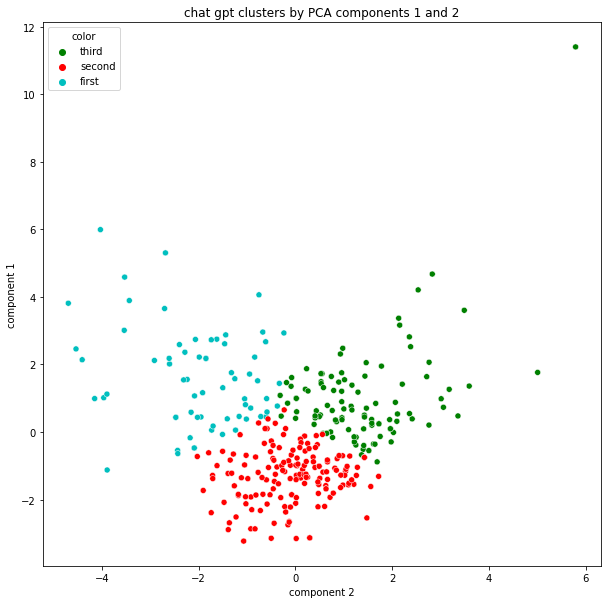

In [73]:
x_axis = gpt_pca_kmeans['component 2']
y_axis = gpt_pca_kmeans['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, hue=gpt_pca_kmeans['color'], palette=['g','r','c','m'])
plt.title('chat gpt clusters by PCA components 1 and 2')
plt.show()

In [74]:
X_TSNE_gpt = TSNE(n_components=2, learning_rate='auto', init='random', perplexity=3).fit_transform(X_scaled_gpt)
kmeans_tsne_gpt = KMeans(n_clusters=4, init='k-means++', random_state=42)
kmeans_tsne_gpt.fit(X_TSNE_gpt)

c:\Users\Franz\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4, random_state=42)

In [76]:
gpt_TSNE = pd.concat([X_scaled_gpt.reset_index(drop=True),  pd.DataFrame(X_TSNE_gpt)],axis=1)
gpt_TSNE.columns.values[-2:] = ['component 1', 'component 2']
gpt_TSNE['kmeans TSNE'] = kmeans_tsne_gpt.labels_
gpt_TSNE['Whisky Name'] = chat_gpt_data['Whisky Name']
gpt_TSNE

,floral,fruit,wood,complexity,malt,sweet,peat,dried_fruits,aftertaste,component 1,component 2,kmeans TSNE,Whisky Name
0,-1.820846,0.577769,-0.440812,-0.154207,-2.436067,0.806069,-0.879301,0.842148,-0.930059,-52.685524,17.831984,3,Glenallachie 8 JahreGlenallachie 8 JahreGlenal...
1,-1.820846,-0.158173,1.572897,0.820496,-2.436067,1.512961,-0.879301,0.274503,-0.013677,-50.955097,19.992140,3,Dalmore Cigar MaltDalmore Cigar MaltDalmore Ci...
2,-1.820846,-4.573825,0.901661,-0.154207,-2.436067,-4.142180,1.093238,-3.131367,0.902705,-0.532712,65.678307,0,Bunnahabhain Staoisha 7 Jahre 2014 / 2022 Sign...
3,3.392688,0.577769,-0.440812,1.795198,-2.436067,0.806069,-0.879301,0.842148,0.902705,-62.244713,10.384711,3,Bruichladdich 21 Jahre Cuvee 382 La BereniceBr...
4,-1.820846,1.313712,0.230424,0.820496,-2.436067,1.512961,-0.879301,0.274503,-0.013677,-51.897575,18.479614,3,Glenallachie 12 JahreGlenallachie 12 JahreGlen...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
330,-0.517463,0.577769,-0.440812,-1.128909,-0.477861,-0.607717,-0.879301,-0.860787,-0.930059,-28.537144,7.243589,3,Kingsbarns BalcomieKingsbarns BalcomieKingsbar...
331,-0.517463,-0.158173,-0.440812,-0.154207,0.011691,0.099176,-0.879301,-0.860787,-0.013677,15.898483,-9.536744,1,Edradour 10 Jahre Chardonnay Cask Nr. 397Edrad...
332,-0.517463,-0.894115,-0.440812,-1.128909,0.011691,-0.607717,-0.879301,-0.860787,-0.930059,-28.058552,10.799779,3,Edradour 10 Jahre Chardonnay Cask Nr. 395Edrad...
333,0.134229,-0.158173,0.901661,-0.154207,0.011691,0.099176,-0.879301,0.274503,-0.013677,16.295954,-13.752045,1,Speyside 13 jahre 2009/2022Speyside 13 jahre 2...


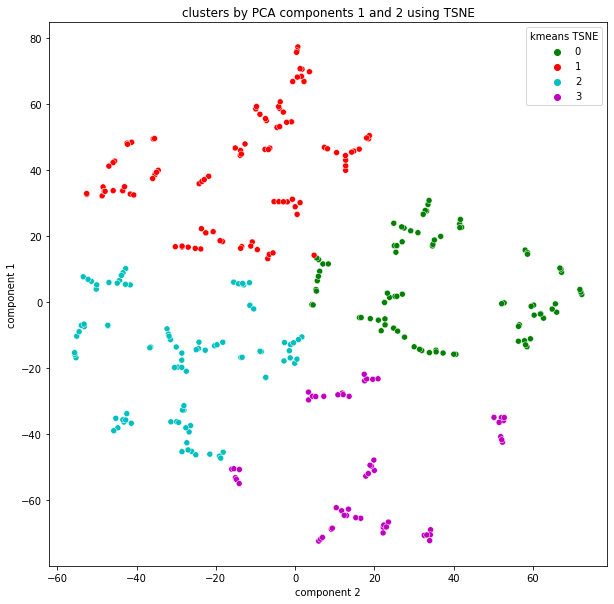

In [77]:
x_axis = gpt_TSNE['component 2']
y_axis = gpt_TSNE['component 1']
plt.figure(figsize=(10,10))
sns.scatterplot(x=x_axis, y=y_axis, data=gpt_TSNE, hue = gpt_TSNE['kmeans TSNE'], palette=['g','r','c','m'])
plt.title('clusters by PCA components 1 and 2 using TSNE')
plt.show()

#### check differences between panelists

In [9]:
'''with open('panelist_1.txt', 'w') as f:
    for line in lines :
        if line.startswith('1'):
            f.write(line)

with open('panelist_2.txt', 'w') as f:
    for line in lines :
        if line.startswith('2'):
            f.write(line)

with open('panelist_3.txt', 'w') as f:
    for line in lines :
        if line.startswith('3'):
            f.write(line)'''

In [10]:
'''panelist_1 = np.loadtxt("data/panelist_1.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_2 = np.loadtxt("data/panelist_2.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
panelist_3 = np.loadtxt("data/panelist_3.txt", delimiter=',',  skiprows=1, usecols=range(2, 11))
# -> Filter for  key of sample
plt.title("panelist 1")
plot_umap(panelist_1, 8)
plt.title("panelist 2")
plot_umap(panelist_2, 8)
plt.title("panelist 3")
plot_umap(panelist_3, 8)'''